<a href="https://colab.research.google.com/github/EZZRITOE/ip_4-hypothesis-testing/blob/main/Ezra_Mageto_week_4_IP_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HYPOTHESIS TESTING FOR THE AUTOLIB ELECTRIC CAR


1.0 IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport 
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')
! pip install pandas==0.25
import pandas_profiling as pp

DATASET LOADING AND EXPLORATION

In [ ]:
autolib_df=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#view the last rows
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#choosing my selected days of interest for hypothesis which will be on weekendss
autolib_df = autolib_df[autolib_df['day_type'] == 'weekend']




# viewing the new dataset
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39
20,75001,1/21/2018,1440,6,weekend,143,150,4,4,8,8,23,25
26,75001,1/27/2018,1440,5,weekend,216,218,1,1,12,12,36,36
27,75001,1/28/2018,1440,6,weekend,190,189,5,5,10,10,32,30
33,75001,2/3/2018,1438,5,weekend,199,204,4,4,15,15,34,37
34,75001,2/4/2018,1440,6,weekend,186,180,2,2,17,17,36,33


In [ ]:
#checking the shape
autolib_df.shape
#the dataset has 16085 rows and 13 colummns

(4541, 13)

In [ ]:
#checking the datatypes of the columns
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#information about the dataset
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 5 to 16082
Data columns (total 13 columns):
Postal code               4541 non-null int64
date                      4541 non-null object
n_daily_data_points       4541 non-null int64
dayOfWeek                 4541 non-null int64
day_type                  4541 non-null object
BlueCars_taken_sum        4541 non-null int64
BlueCars_returned_sum     4541 non-null int64
Utilib_taken_sum          4541 non-null int64
Utilib_returned_sum       4541 non-null int64
Utilib_14_taken_sum       4541 non-null int64
Utilib_14_returned_sum    4541 non-null int64
Slots_freed_sum           4541 non-null int64
Slots_taken_sum           4541 non-null int64
dtypes: int64(11), object(2)
memory usage: 496.7+ KB


In [ ]:
#overall description of the dataset
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,88794.686633,1434.694781,5.500771,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,20.819324,0.500054,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,1318.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1440.000000,5.000000,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,6.000000,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,1440.000000,6.000000,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#getting a profile report using pandas profiling
pp.ProfileReport(autolib_df)

Number of variables,14
Number of observations,4541
Total Missing (%),0.0%
Total size in memory,496.8 KiB
Average record size in memory,112.0 B
Numeric,4
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,8


#1.1 CLEANING THE DATASET

DROPPING COLUMNS

In [ ]:
#since we are only dealing with blue cars,the utilib car will not be considered
#we drop columns containing utilib car information
autolib_df.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum'], axis = 1, inplace = True)
autolib_df


MISSING VALUES

In [ ]:
autolib_df.isnull().sum()# checking for missing values
#missing values are lacking in the columns

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

ANOMALIES

In [ ]:
#checking for anomalies by verifying the duplicates 
autolib_df.duplicated().value_counts()
#no duplicates available

False    4541
dtype: int64

#2 FINDING OUTLIERS

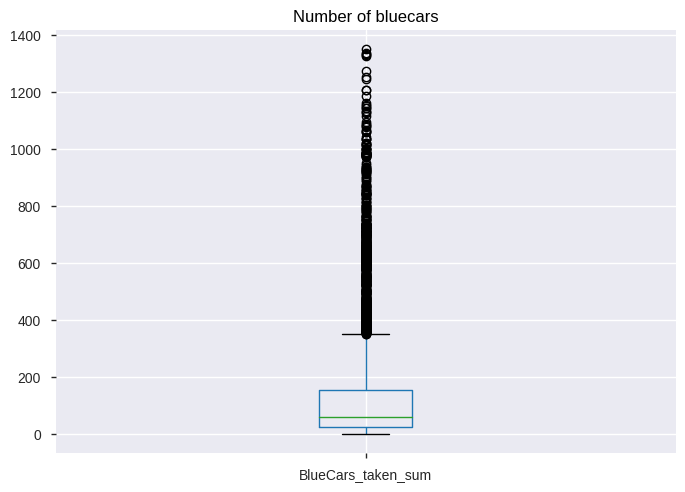

In [ ]:
#checking for outliers using boxplot
plt.figure()
autolib_df.boxplot(['BlueCars_taken_sum'])
plt.title("Number of bluecars", color = 'black')
plt.show()

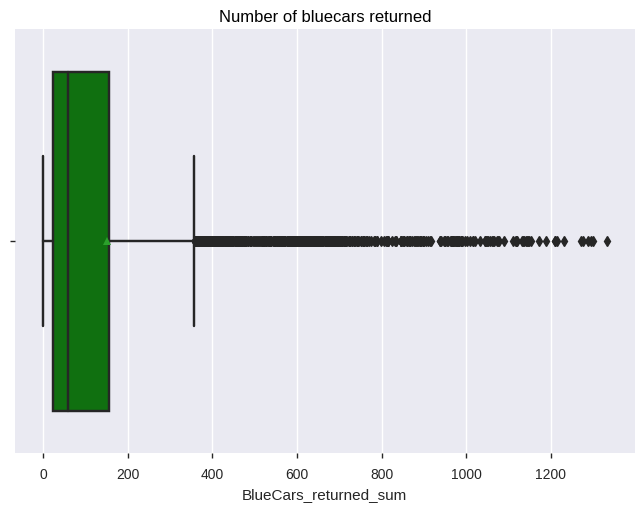

In [ ]:
#outliers in the bluecars returned sum variable
plt.figure()
sns.boxplot(autolib_df['BlueCars_returned_sum'], showmeans = True , color = 'green')
plt.title("Number of bluecars returned", color = 'black')
plt.show()

#3 Univariate analysis

Text(0.5, 1.0, 'distribution plot of the blue cars taken')

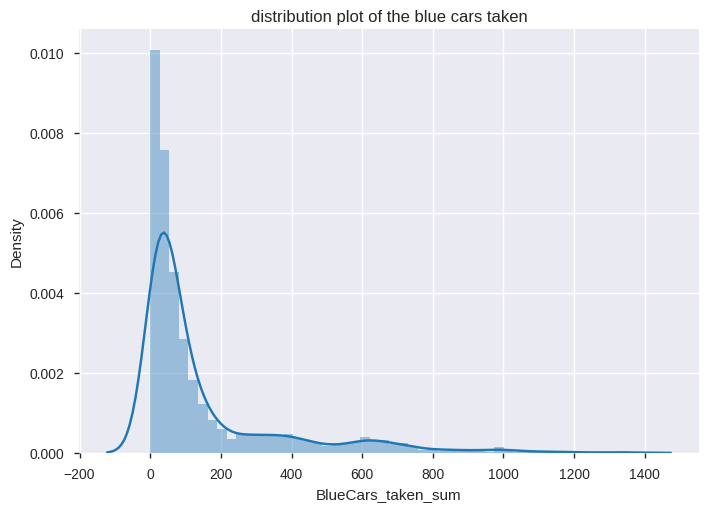

In [ ]:
#histogram of blue cars taken
sns.distplot(autolib_df.BlueCars_taken_sum, kde = True)
plt.title('distribution plot of the blue cars taken')

Text(0.5, 1.0, 'distribution of blue cars returned')

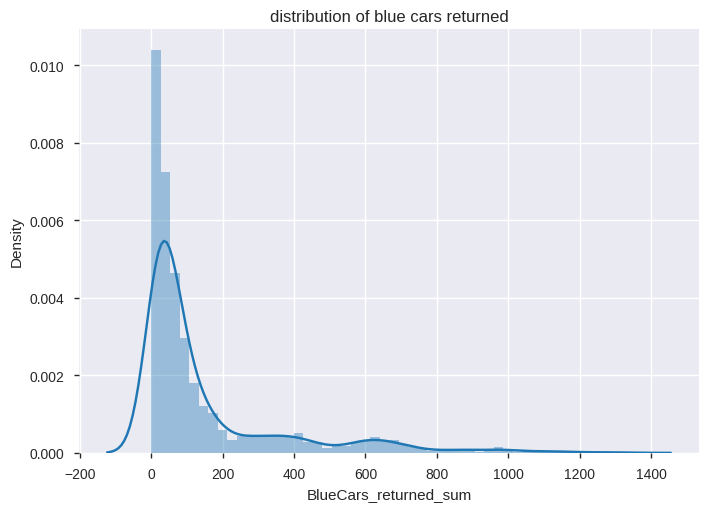

In [ ]:
#histogram of blue cars returned
sns.distplot(autolib_df.BlueCars_returned_sum, kde = True)
plt.title('distribution of blue cars returned')

In [ ]:

 #Creating a frequency table of day of week column and the bluecars taken
# 
autolib_df.groupby('dayOfWeek')['BlueCars_taken_sum'].sum()

dayOfWeek
5    353934
6    332166
Name: BlueCars_taken_sum, dtype: int64

Measure of central tendancy

In [ ]:
max1 = autolib_df.BlueCars_taken_sum.max() 
min1 = autolib_df.BlueCars_taken_sum.min() 
Range1 = max1 - min1
print('The mean is' + ' ' + str(autolib_df.BlueCars_taken_sum.mean()))
print('The median is' + ' ' + str(autolib_df.BlueCars_taken_sum.median()))
print('The mode is' + ' ' + str(autolib_df.BlueCars_taken_sum.mode()))
print('The range is' + ' ' + str(Range1))
print('The standard deviation is' + ' ' + str(autolib_df.BlueCars_taken_sum.std()))
print('The variance is' + ' ' + str(autolib_df.BlueCars_taken_sum.var()))
print('The skewness is' + ' ' + str(autolib_df.BlueCars_taken_sum.skew()))
print('The kurtosis is' + ' ' + str(autolib_df.BlueCars_taken_sum.kurt()))
print('The Interquartile range is as follows' + ' ' + str(autolib_df.BlueCars_taken_sum.quantile([0.25,0.5,0.75])))


The mean is 151.09006826690157
The median is 59.0
The mode is 0    14
dtype: int64
The range is 1352
The standard deviation is 218.5656415891513
The variance is 47770.93968327735
The skewness is 2.3007208190452824
The kurtosis is 5.295039714140337
The Interquartile range is as follows 0.25     25.0
0.50     59.0
0.75    156.0
Name: BlueCars_taken_sum, dtype: float64


#4 Bivariate Analysis

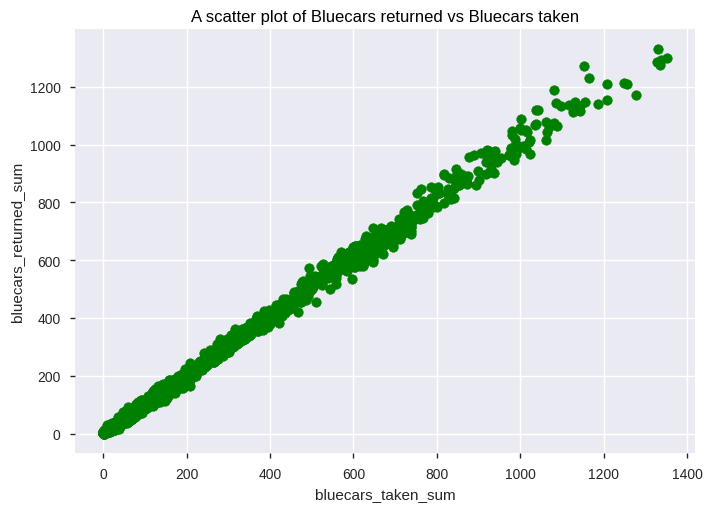

In [ ]:
#creating a scatterplot
plt.figure()
plt.scatter(autolib_df['BlueCars_taken_sum'], autolib_df['BlueCars_returned_sum'], color = 'GREEN')
plt.title('A scatter plot of Bluecars returned vs Bluecars taken', color = 'black')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.show()
#a strong corelation exists between the two variables


#5 Hypothesis testing
null hypothesis: number of blue cars taken on saturday are more than sunday

alternate hypothesis:number of blue cars taken on saturday are not more than sunday 

In [ ]:
#use simple random sampling
weekend=autolib_df[(autolib_df['day_type']=='weekend')]
weekend

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,41,39
20,75001,1/21/2018,1440,6,weekend,143,150,23,25
26,75001,1/27/2018,1440,5,weekend,216,218,36,36
27,75001,1/28/2018,1440,6,weekend,190,189,32,30
33,75001,2/3/2018,1438,5,weekend,199,204,34,37
34,75001,2/4/2018,1440,6,weekend,186,180,36,33


In [ ]:
#use simple random sample to identify 10 weekends
weekend_sample = weekend.sample(n = 10, replace="False")
weekend_sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
1926,75013,2/24/2018,1396,5,weekend,36,56,16,13
6976,92260,4/29/2018,1440,6,weekend,43,45,0,0
9695,92700,2/10/2018,1440,5,weekend,136,120,0,0
3146,75112,1/27/2018,1440,5,weekend,12,14,4,4
3259,75112,6/3/2018,1440,6,weekend,21,18,2,1
15207,94500,3/3/2018,1440,5,weekend,36,43,0,0
5707,92170,4/8/2018,1440,6,weekend,71,77,0,0
3369,75116,4/7/2018,1318,5,weekend,6,6,0,0
11972,93390,1/21/2018,1440,6,weekend,9,5,0,0
14789,94340,4/21/2018,1440,5,weekend,54,49,0,0


In [ ]:
#sum of blue cars for the two days of the weekeend
df = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_taken_sum.sum()
df

dayOfWeek
5    280
6    144
Name: BlueCars_taken_sum, dtype: int64

In [ ]:
#sum of blue cars returned
df = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_returned_sum.sum()
df

dayOfWeek
5    288
6    145
Name: BlueCars_returned_sum, dtype: int64

In [ ]:
# Mean of blue cars taken
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_taken_sum.mean()
df2

dayOfWeek
5    46.666667
6    36.000000
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
# Population mean for blue cars taken
df2 = weekend.groupby(weekend["dayOfWeek"]).BlueCars_taken_sum.mean()
df2

dayOfWeek
5    156.124393
6    146.071240
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
#pop mean for blue cars returned
df2 = weekend.groupby(weekend["dayOfWeek"]).BlueCars_returned_sum.mean()
df2

dayOfWeek
5    155.081606
6    148.986368
Name: BlueCars_returned_sum, dtype: float64

In [ ]:
# Mean of blue cars returned
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_returned_sum.mean()
df2

dayOfWeek
5    48.00
6    36.25
Name: BlueCars_returned_sum, dtype: float64

In [ ]:
# Std deviation of blue cars taken
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_taken_sum.std()
df2

dayOfWeek
5    47.153650
6    27.251911
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
# Std deviation of blue cars returned
df2 = weekend_sample.groupby(weekend_sample["dayOfWeek"]).BlueCars_returned_sum.std()
df2

dayOfWeek
5    40.482095
6    31.868218
Name: BlueCars_returned_sum, dtype: float64


##Calculate the test statistic 

T statistic



In [ ]:

# Saturday Blue cars taken
# t =  ((sample mean - pop'n mean)/ sample std deviation)
x = (46.666667 -156.124393 )/  47.153650

#Saturday blue cars returned
p= (48.00- 155.081606)/  40.482095

# Sunday blue cars taken
y = ( 36.000000 -   146.071240)/  27.251911

# Sunday blue cars returned
h = ( 36.25 - 148.986368)/ 31.868218

#Obtaining the  P-Value

In [ ]:
prob = stats.norm.cdf(x)
prob

0.01013535299452033

In [ ]:
prob = stats.norm.cdf(p)
prob

0.004082618602493486

P value of saturday blue cars is less than the level of significance of 0.05 therfore we reject the null hypothesis

In [ ]:
prob = stats.norm.cdf(y)
prob

2.6836543882541396e-05

In [ ]:
prob = stats.norm.cdf(h)
prob

0.00020190598044786962

P value of sunday's blue car is less than the level of significance therefore we reject the null hypothesis